![title](image/ies.PNG)

## Python plotting - Map and data analysis

### In this final presentation of our 3-week meeting, we will introduce the use of:
#### Basemap - A python library to make maps
https://matplotlib.org/basemap/
#### Advanced usage of pandas: how to quickly filter, match and read data
#### Examples solution of real work task
##### Ex1: Plotting results of earthquake relocation from hypoDD
##### Ex2: Plotting an example seismic tomography image (online tutorial)

---
A very common error with Basemap:

~~~
KeyError: 'PROJ_LIB'
~~~

Solution:

#### Solution 1

For Linux/Mac: Add the variable to ~/.bashrc or ~/.bash_profile
~~~
export CONDA_PREFIX=/Users/nghianc/anaconda3/
export PROJ_LIB=$CONDA_PREFIX/share/proj
~~~
For Windows: Add the environment variable

#### Solution 2
~~~
import os
os.environment['PROJ_LIB'] = "/link_to/anaconda3/share/proj"
~~~

#### Solution 3

Find the working version of Basemap and its required packages...

In [1]:
# Plots now appear in the notebook.
%matplotlib inline                       

from __future__ import print_function, division    # Python 2 and 3 are now very similar
import matplotlib.pyplot as plt
plt.style.use('ggplot')                            # Matplotlib style sheet - nicer plots!
plt.rcParams['figure.figsize'] = 12, 8             # Slightly bigger plots by default


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np

----
## Example 1: Plotting results of earthquake relocation from hypoDD

Here is the first few lines of the file
~~~
hypo_a.dat
1 2011 1 1 6 47 53.570 -3.226764 100.180293 8.402 3.6 0.969
4 2011 1 2 7 44 53.260 2.000254 96.749619 2.354 3.3 0.969
5 2011 1 2 15 19 32.000 -4.559905 101.259169 45.643 5.6 0.946
6 2011 1 2 17 3 44.050 -2.957765 101.029974 44.459 4.7 1.036
~~~

~~~
hypo_b.dat
1 2011 1 1 6 47 53 -3.24 100.19 12 3.6 0.217
2 2011 1 1 7 52 27 2.93 98.53 112 3.3 0.783
3 2011 1 1 15 6 31 -2.83 103.88 31 3.5 0.726
4 2011 1 2 7 44 53 1.97 96.7 10 3.3 0.863
5 2011 1 2 15 19 32 -4.56 101.26 46 5.6 1.105
6 2011 1 2 17 3 44 -2.96 101.04 47 4.7 0.49
~~~

In [4]:
#First, we read the data
dfb = pd.read_csv("data/hypo_b.dat", header = None, delim_whitespace=True, 
                  names = ["ID","YY","MM","DD","HH","MI","SE","latb","lonb","c","d","e"])
dfa = pd.read_csv("data/hypo_a.dat", header = None, delim_whitespace=True, 
                  names = ["ID","YY","MM","DD","HH","MI","SE","lata","lona","c","d","e"])


In [5]:
dfa.head()

,ID,YY,MM,DD,HH,MI,SE,lata,lona,c,d,e
0,1,2011,1,1,6,47,53.57,-3.226764,100.180293,8.402,3.6,0.969
1,4,2011,1,2,7,44,53.26,2.000254,96.749619,2.354,3.3,0.969
2,5,2011,1,2,15,19,32.00,-4.559905,101.259169,45.643,5.6,0.946
3,6,2011,1,2,17,3,44.05,-2.957765,101.029974,44.459,4.7,1.036
4,10,2011,1,5,10,15,38.01,-2.617952,99.891154,17.960,5.3,0.479


In [6]:
dfb.head()

,ID,YY,MM,DD,HH,MI,SE,latb,lonb,c,d,e
0,1,2011,1,1,6,47,53.0,-3.24,100.19,12,3.6,0.217
1,2,2011,1,1,7,52,27.0,2.93,98.53,112,3.3,0.783
2,3,2011,1,1,15,6,31.0,-2.83,103.88,31,3.5,0.726
3,4,2011,1,2,7,44,53.0,1.97,96.70,10,3.3,0.863
4,5,2011,1,2,15,19,32.0,-4.56,101.26,46,5.6,1.105


In [7]:
df_dd = pd.merge(dfa,dfb, on="ID")

In [8]:
df_dd.head()

,ID,YY_x,MM_x,DD_x,HH_x,MI_x,SE_x,lata,lona,c_x,...,MM_y,DD_y,HH_y,MI_y,SE_y,latb,lonb,c_y,d_y,e_y
0,1,2011,1,1,6,47,53.57,-3.226764,100.180293,8.402,...,1,1,6,47,53.0,-3.24,100.19,12,3.6,0.217
1,4,2011,1,2,7,44,53.26,2.000254,96.749619,2.354,...,1,2,7,44,53.0,1.97,96.70,10,3.3,0.863
2,5,2011,1,2,15,19,32.00,-4.559905,101.259169,45.643,...,1,2,15,19,32.0,-4.56,101.26,46,5.6,1.105
3,6,2011,1,2,17,3,44.05,-2.957765,101.029974,44.459,...,1,2,17,3,44.0,-2.96,101.04,47,4.7,0.490
4,10,2011,1,5,10,15,38.01,-2.617952,99.891154,17.960,...,1,5,10,15,39.0,-2.57,99.89,25,5.3,1.796


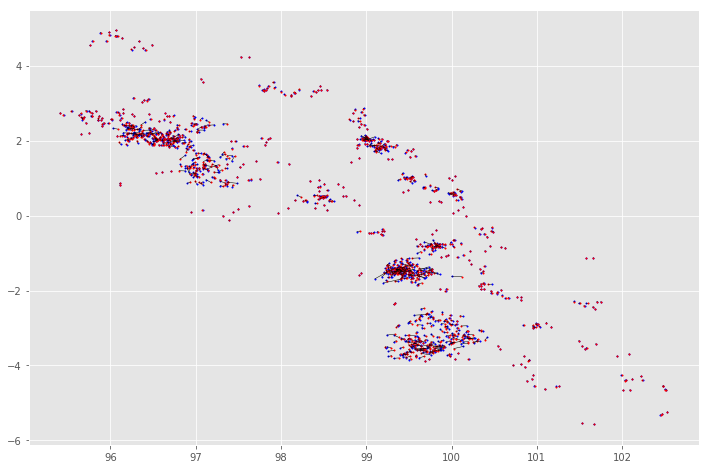

In [9]:
#Using a pd.merge command we can easily group them together
df_dd = pd.merge(dfa,dfb,on="ID")
plt.figure()
plt.plot([df_dd.lona,df_dd.lonb],[df_dd.lata,df_dd.latb], "k",linewidth=0.5)
plt.scatter(df_dd.lonb,df_dd.latb, s = 2, c = "b")
plt.scatter(df_dd.lona,df_dd.lata, s = 2, c = "r")
plt.show()

----
### There could be some events which are not relocated. Let's check!

In [10]:
print(len(dfa),len(dfb))
print(len(dfb)-len(dfa))

1094 2369
1275


In [11]:
len(df_dd)

1094

In [18]:
dfb[dfb.MM > 6]

,ID,YY,MM,DD,HH,MI,SE,latb,lonb,c,d,e
473,474,2009,7,1,8,48,22.0,4.40,96.56,10,4.4,0.287
474,475,2009,7,1,18,58,0.0,0.39,96.79,18,5.1,1.910
475,476,2009,7,2,8,51,56.0,-1.05,100.14,10,5.1,1.253
476,477,2009,7,3,10,26,35.0,-2.70,102.14,156,5.1,1.794
477,478,2009,7,4,14,44,16.0,-3.74,102.07,49,4.3,0.999
478,479,2009,7,4,20,43,41.0,-4.49,102.16,27,4.1,0.351
479,480,2009,7,5,12,25,37.0,1.07,99.47,158,4.6,0.661
480,481,2009,7,6,16,0,46.0,3.19,93.68,46,5.1,2.444
481,482,2009,7,8,13,29,59.0,-4.71,103.86,10,3.9,0.868
482,483,2009,7,9,5,33,18.0,5.11,96.08,10,4.3,2.180


In [14]:
dfm = dfb[~dfb.ID.isin(list(dfa.ID))]

,ID,YY,MM,DD,HH,MI,SE,latb,lonb,c,d,e
1,2,2011,1,1,7,52,27.0,2.93,98.53,112,3.3,0.783
2,3,2011,1,1,15,6,31.0,-2.83,103.88,31,3.5,0.726
6,7,2011,1,3,2,21,53.0,-4.98,102.81,53,3.4,0.188
7,8,2011,1,4,0,28,31.0,-0.64,99.03,10,3.7,0.691
8,9,2011,1,4,13,21,34.0,-0.19,98.84,10,4.5,0.360
10,11,2011,1,5,12,35,2.0,0.47,100.25,65,3.1,0.620
12,13,2011,1,6,10,32,15.0,-5.78,103.84,23,4.2,0.354
13,14,2011,1,7,1,14,40.0,-3.91,100.05,68,4.5,1.256
14,15,2011,1,7,23,0,13.0,4.81,96.03,11,3.5,0.115
19,20,2011,1,10,20,13,15.0,2.10,96.41,14,4.5,1.639


In [19]:
dfm = dfb[~dfb.ID.isin(list(dfa.ID))]
len(dfm)

1275

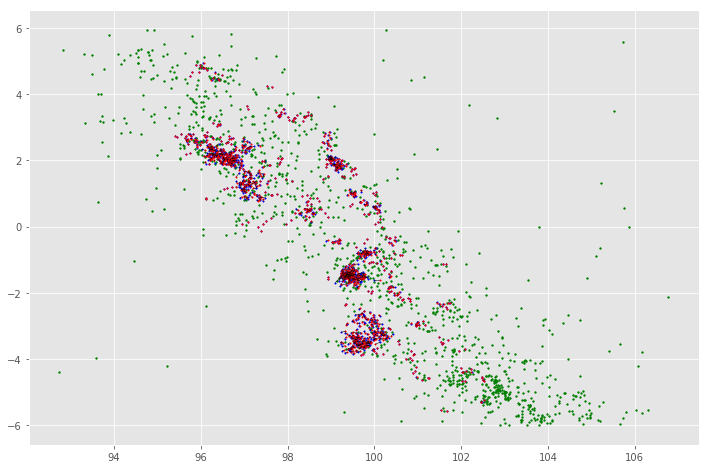

In [20]:
plt.figure()
plt.scatter(dfm.lonb,dfm.latb,s = 3, c = "g")
plt.plot([df_dd.lona,df_dd.lonb],[df_dd.lata,df_dd.latb], "k",linewidth=0.5)
plt.scatter(df_dd.lonb,df_dd.latb, s = 2, c = "b")
plt.scatter(df_dd.lona,df_dd.lata, s = 2, c = "r")
plt.show()

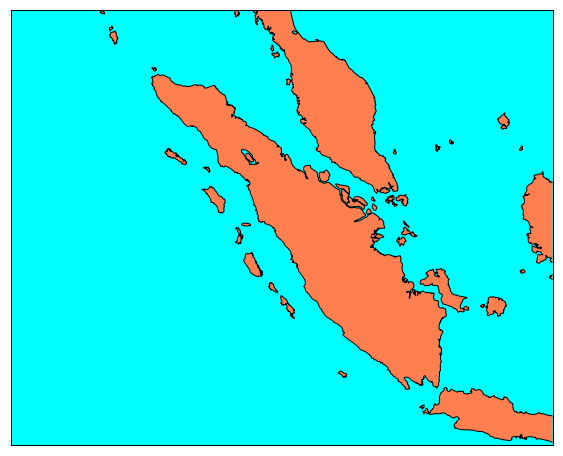

In [21]:
plt.figure(figsize=(12,8))
m = Basemap(projection='merc',llcrnrlat=-8,urcrnrlat=8,
            llcrnrlon=90,urcrnrlon=110,resolution="i")
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
plt.show()

In [22]:
dir(m)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ax_plt_from_kw',
 '_boundarypolyll',
 '_boundarypolyxy',
 '_check_ax',
 '_cliplimb',
 '_fulldisk',
 '_getmapboundary',
 '_initialized_axes',
 '_mapboundarydrawn',
 '_readboundarydata',
 '_restore_hold',
 '_save_use_hold',
 'anchor',
 'arcgisimage',
 'area_thresh',
 'aspect',
 'ax',
 'barbs',
 'bluemarble',
 'boundarylats',
 'boundarylonmax',
 'boundarylonmin',
 'boundarylons',
 'boundinglat',
 'celestial',
 'coastpolygons',
 'coastpolygontypes',
 'coastsegs',
 'colorbar',
 'contour',
 'contourf',
 'drawcoastlines',
 'drawcounties',
 'drawcountries',
 'drawgreatcircle',
 'drawlsmask',
 'drawmapboundary',
 'd

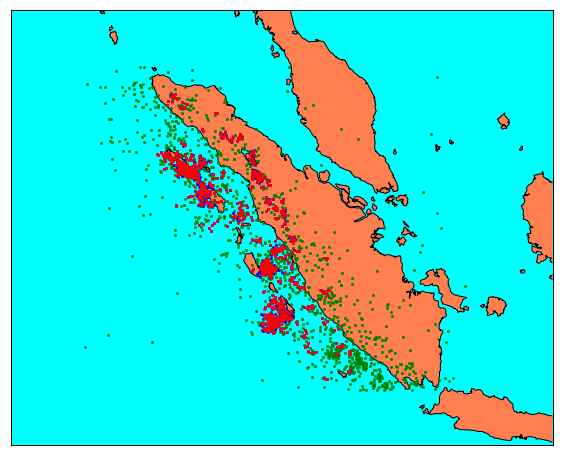

In [28]:
plt.figure(figsize=(12,8))
m = Basemap(projection='merc',llcrnrlat=-8,urcrnrlat=8,llcrnrlon=90,urcrnrlon=110,resolution="i")
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua',zorder=1)

lon = np.array(dfm["lonb"])
lat = np.array(dfm["latb"])
lon, lat = m(lon,lat)
m.scatter(lon,lat, marker = "o",color = "g",s = 6,zorder=2)

lon = np.array(df_dd["lonb"])
lat = np.array(df_dd["latb"])
lon, lat = m(lon,lat)
m.scatter(lon,lat, marker = "o",color = "b",s = 6,zorder=2)

lon = np.array(df_dd["lona"])
lat = np.array(df_dd["lata"])
lon, lat = m(lon,lat)
m.scatter(lon,lat, marker = "o",color = "r",s = 6,zorder=2)


plt.show()

In [33]:
def mapscatter(df,col_lon, col_lat, marker, color, size, label = None):
    """A simple function to shorten the code
    for example +;gagds
    """
    lon = np.array(df[col_lon])
    lat = np.array(df[col_lat])
    lon, lat = m(lon,lat)
    m.scatter(lon,lat, marker = marker,color = color,s = size,zorder=2, label=label)


In [31]:
# def mapscatter(df, col_lon, col_lat, marker, color, size, label = None):
#     lon = np.array(df[col_lon])
#     lat = np.array(df[col_lat])
#     lon, lat = m(lon,lat)
#     m.scatter(lon,lat, marker = marker,color = color,s = size,zorder=2,label = label)


In [ ]:
mapscatter()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10.3 µs


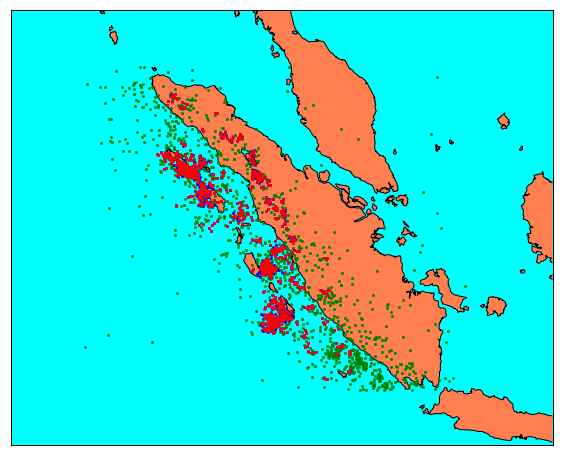

In [34]:
%time
plt.figure(figsize=(12,8))
m = Basemap(projection='merc',llcrnrlat=-8,urcrnrlat=8,llcrnrlon=90,urcrnrlon=110,resolution="i")
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua',zorder=1)

mapscatter(dfm, "lonb","latb", "o", "g",6)
mapscatter(df_dd, "lonb","latb", "o", "b",6)
mapscatter(df_dd, "lona","lata", "o", "r",6)

plt.show()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


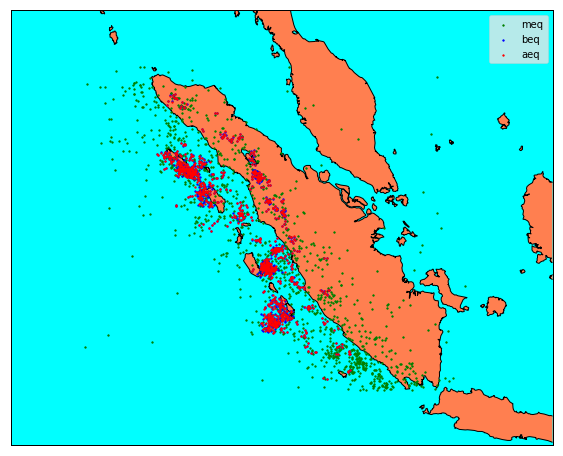

In [35]:
%time
dict_map = {"meq":[dfm,"lonb","latb","o","g",3],
           "beq":[df_dd,"lonb","latb","o","b",3],
           "aeq":[df_dd,"lona","lata","o","r",3]}
plt.figure(figsize=(12,8))
m = Basemap(projection='merc',llcrnrlat=-8,urcrnrlat=8,llcrnrlon=90,urcrnrlon=110,resolution="i")
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua',zorder=1)

for eq, prop in dict_map.items():
    mapscatter(prop[0],prop[1],prop[2],prop[3],prop[4],prop[5],eq)

plt.legend()
plt.show()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs


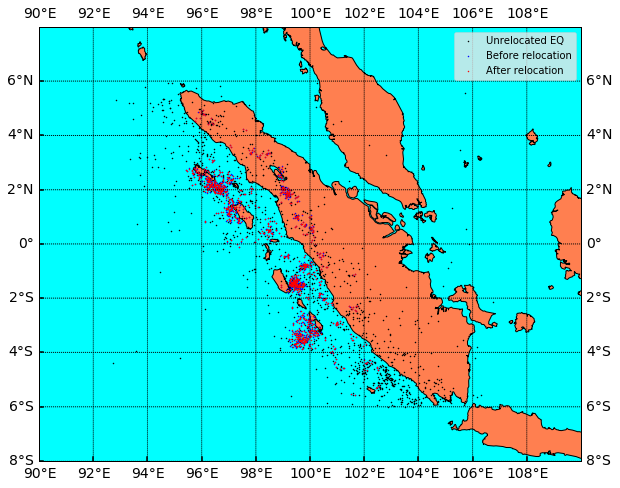

In [40]:
%time
plt.figure(figsize=(12,8))

lonmin,lonmax,latmin,latmax = 90,110,-8,8

m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,llcrnrlon=lonmin,urcrnrlon=lonmax,resolution="i")
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua',zorder=1)

mapscatter(dfm, "lonb","latb", "o", "k",1,"Unrelocated EQ")
mapscatter(df_dd, "lonb","latb", "o", "b",1,"Before relocation")
mapscatter(df_dd, "lona","lata", "o", "r",1,"After relocation")

parallels = np.arange(-8,8,2)
m.drawparallels(parallels,
               labels=[1,1,0,0],
               fontsize=14,
               linewidth=1.0)
meridians = np.arange(90,110,2)
for lat in parallels:
    lon1 = lonmin - 0.1; lon2 = lonmin + 0.15
    lon1,lat1 = m(lon1,lat)
    lon2,lat2 = m(lon2,lat)
    m.plot([lon1,lon2],[lat1,lat2],'k',linewidth=1.5)


m.drawmeridians(meridians,
               labels=[1,1,1,1],
               fontsize=14,
               linewidth=1.0)
for lon in meridians:
    lat1 = latmin-0.1; lat2 = latmin+0.15
    lon1,lat1 = m(lon,lat1)
    lon2, lat2 = m(lon,lat2)
    m.plot([lon1,lon2],[lat1,lat2],'k',linewidth=1.5)

plt.legend()
plt.show()

----
#### Beautify the map with ArcGIS API:

http://server.arcgisonline.com/arcgis/rest/services

http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=-5568771.184797843,221644.30926105054,-2827285.881730394,2487627.569658401&bboxSR=23844&imageSR=23844&size=200,165&dpi=96&format=png32&transparent=true&f=image


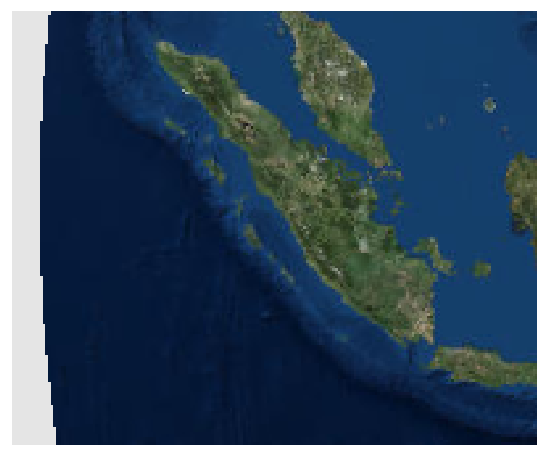

In [44]:
plt.figure()
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution="i",epsg=23844)

m.arcgisimage(service='World_Imagery', xpixels = 200, verbose= True)
plt.show()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 26.9 µs


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


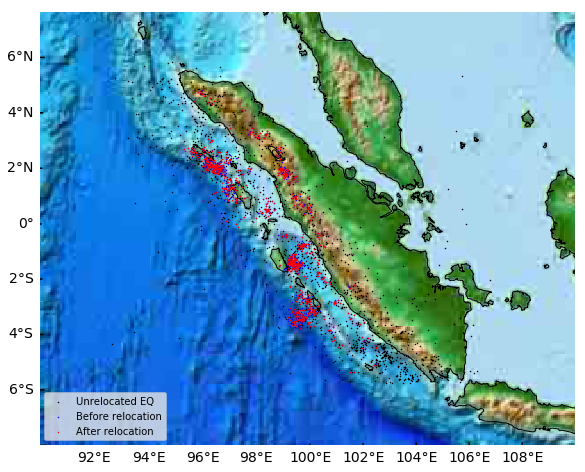

In [49]:
%time
plt.figure(figsize=(12,8))

lonmin,lonmax,latmin,latmax = 90,110,-8,8

m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution="i",epsg=23834)
# draw coastlines.
m.drawcoastlines()

mapscatter(dfm, "lonb","latb", "o", "k",1,"Unrelocated EQ")
mapscatter(df_dd, "lonb","latb", "o", "b",1,"Before relocation")
mapscatter(df_dd, "lona","lata", "o", "r",1,"After relocation")

parallels = np.arange(-8,8,2)
m.drawparallels(parallels,
               labels=[1,0,0,0],
               fontsize=14,
               linewidth=0.0)
meridians = np.arange(90,110,2)
for lat in parallels:
    lon1 = lonmin - 0.2; lon2 = lonmin + 0.25
    lon1,lat1 = m(lon1,lat)
    lon2,lat2 = m(lon2,lat)
    m.plot([lon1,lon2],[lat1,lat2],'k',linewidth=1.5)


m.drawmeridians(meridians,
               labels=[0,0,0,1],
               fontsize=14,
               linewidth=0.0)
for lon in meridians:
    lat1 = latmin-0.25; lat2 = latmin - 0.5
    lon1,lat1 = m(lon,lat1)
    lon2, lat2 = m(lon,lat2)
    m.plot([lon1,lon2],[lat1,lat2],'k',linewidth=1.5)

plt.legend()
#m.arcgisimage(service='World_Topo_Map', xpixels = 100, verbose= True)
m.etopo()
#m.shadedrelief()

plt.show()

In [ ]:
m.shadedrelief()